In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
covid = pd.read_csv('./data/merged_dataset.csv', dtype={'county_fips_code':str})

In [3]:
covid['percent_red'] = covid['trump_votes']/covid['total_votes']

In [4]:
covid['percent_minority'] = covid['minority_group_total']/covid['tot_pop']

#### for visualization purposes, I am dropping LA county because it is a massive outlier. 

In [5]:
viz_df = covid[covid['county_fips_code']!='06037']

In [6]:
#checking what the 50th and 75th percentile are for deaths per hundred thousand
covid['deaths_per_hun_thou'].describe()

count    3133.000000
mean      316.273180
std       145.132269
min         0.000000
25%       215.782984
50%       306.161500
75%       403.856479
max      1102.883252
Name: deaths_per_hun_thou, dtype: float64

No handles with labels found to put in legend.


''

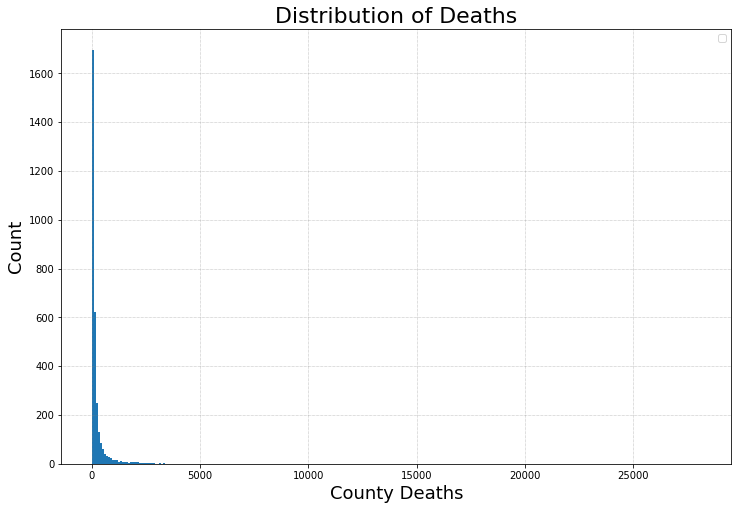

In [7]:
plt.figure(figsize=(12, 8))
plt.hist(covid['deaths'], bins = 300)
# plt.axvline(x=403.8, c='red', label='75th Percentile')
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend()
plt.title('Distribution of Deaths', size=22)
plt.xlabel('County Deaths', size=18)
plt.ylabel('Count', size=18)


;

When we examine the distribution of deaths by county, we see that the variable is very skewed, with a large amount of the counties having a relatively low number of deaths. This makes since because a lot of the counties in our data set are relatively small.

''

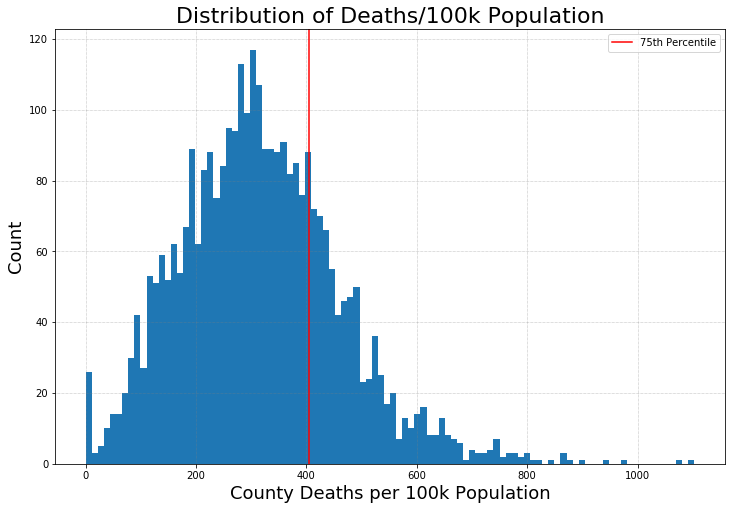

In [8]:
plt.figure(figsize=(12, 8))
plt.hist(covid['deaths_per_hun_thou'], bins = 100)
plt.axvline(x=403.8, c='red', label='75th Percentile')
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend()
plt.title('Distribution of Deaths/100k Population', size=22)
plt.xlabel('County Deaths per 100k Population', size=18)
plt.ylabel('Count', size=18)


;

In [9]:
covid['deaths_per_hun_thou'].median()

306.16150019135097

When we examine our distribution of deaths per 100k population, we see a much more normal distribution centered around a median value of 306.

''

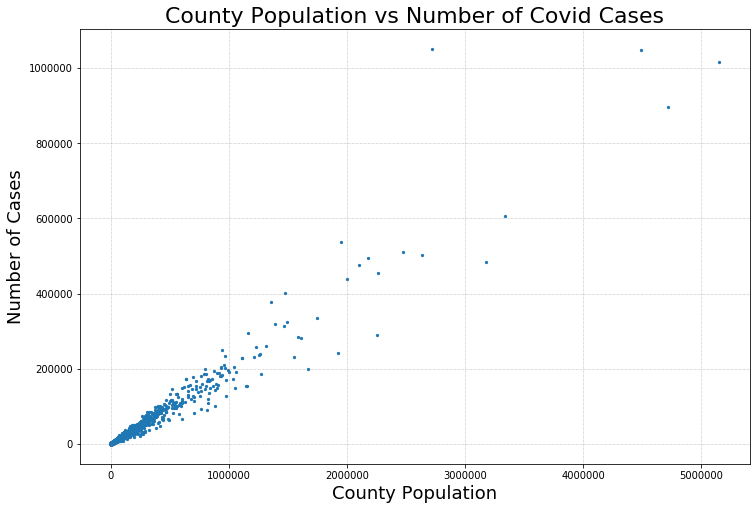

In [10]:
#population v cases
plt.figure(figsize=(12, 8))
plt.scatter(viz_df['tot_pop'], viz_df['cases'], s = 5)
plt.title('County Population vs Number of Covid Cases', size = 22)
plt.xlabel('County Population', size = 18)
plt.ylabel('Number of Cases', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.savefig('./assets/cases_v_pop')
;

We see a very strong linear relationship between county population and the number of cases. 

''

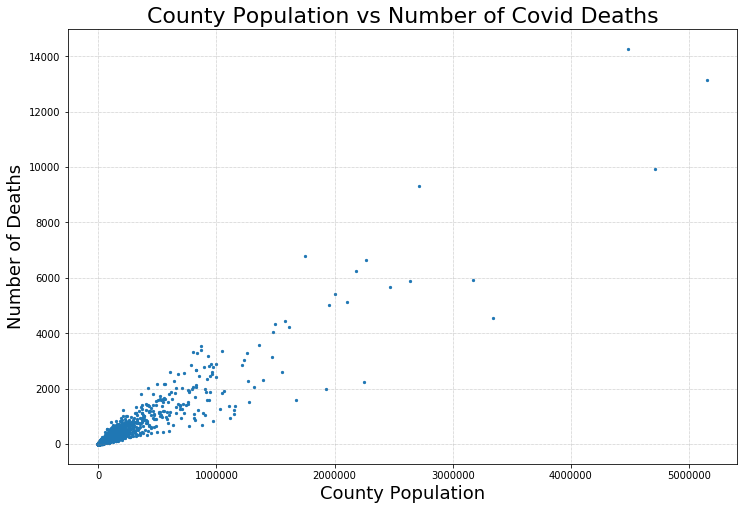

In [11]:
#population v deaths
plt.figure(figsize=(12, 8))
plt.scatter(viz_df['tot_pop'], viz_df['deaths'], s = 5)
plt.title('County Population vs Number of Covid Deaths', size = 22)
plt.xlabel('County Population', size = 18)
plt.ylabel('Number of Deaths', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.savefig('./assets/cases_v_deaths')
;

the linear relationship between number of deaths and county population is a lot weaker, with the range of deaths per 100k population expanding significantly as the population increases.

''

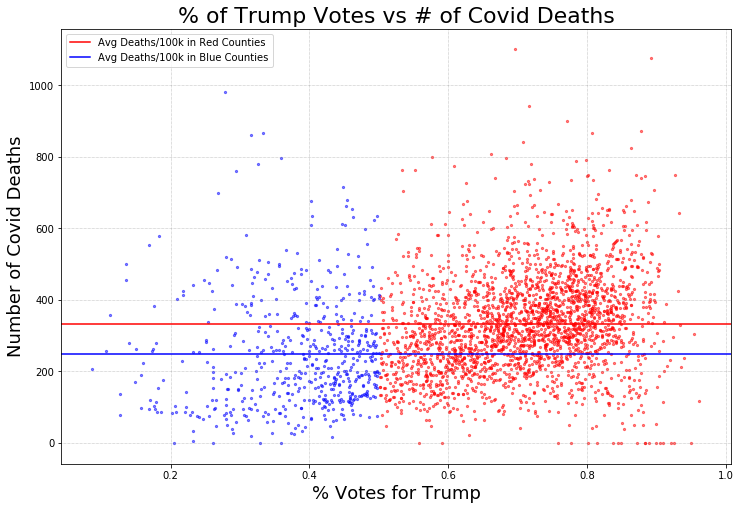

In [12]:
#population v deaths

temp_red = viz_df[viz_df['percent_red']>0.5]
temp_blue = viz_df[viz_df['percent_red']<=0.5]



plt.figure(figsize=(12, 8))
plt.scatter(temp_red['percent_red'], temp_red['deaths_per_hun_thou'], s=5, alpha=0.5, c='red')
plt.scatter(temp_blue['percent_red'], temp_blue['deaths_per_hun_thou'], s=5, alpha=0.5, c='blue')
plt.title('% of Trump Votes vs # of Covid Deaths', size = 22)
plt.xlabel('% Votes for Trump', size = 18)
plt.ylabel('Number of Covid Deaths', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)

plt.axhline(y=333, c='red')
plt.axhline(y=249, c='blue')

plt.legend(['Avg Deaths/100k in Red Counties', 'Avg Deaths/100k in Blue Counties'])
plt.savefig('./assets/trump_v_death')
;



Because the pandemic has been highly politicized, I thought it would be interesting to do some of our visual analysis through a political lense. I have plotted counties with more than 50% of their votes going to trump in red, and counties with less than 50% of their votes going to trump in blue. 

I have also included the average number of deaths in red vs blue counties. 

overall we see a very loosely linear relationship, with the number of deaths increasing as the proportion of trump supporters increases. 

''

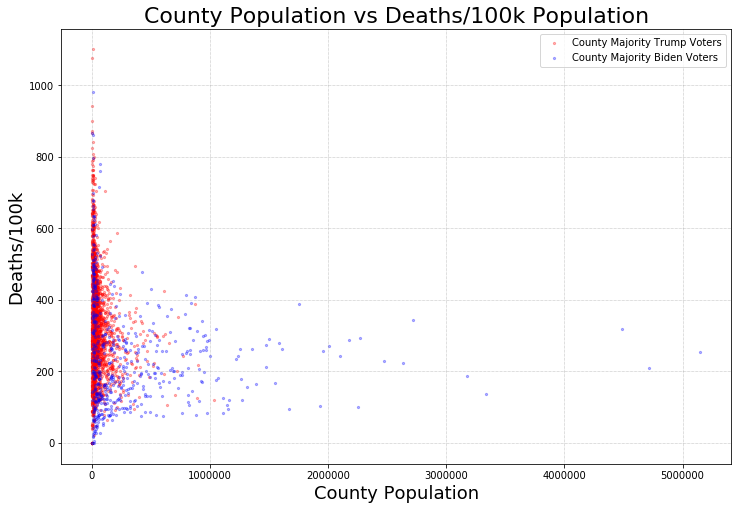

In [13]:
#examining smaller counties
viz_red = viz_df[viz_df['percent_red']>0.5]
viz_blue = viz_df[viz_df['percent_red']<=0.5]

#population v Deaths per 100k
plt.figure(figsize=(12, 8))
plt.scatter(viz_red['tot_pop'], viz_red['deaths_per_hun_thou'], s = 5, c='red', alpha = 0.3)
plt.scatter(viz_blue['tot_pop'], viz_blue['deaths_per_hun_thou'], s = 5, c='blue', alpha = 0.3)
plt.title('County Population vs Deaths/100k Population', size = 22)
plt.xlabel('County Population', size = 18)
plt.ylabel('Deaths/100k', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend(['County Majority Trump Voters', 'County Majority Biden Voters'])
plt.savefig('./assets/pop_v_deaths_1')
;

It is difficult to tell exactly what is going on in this graph, so I zoom in below to analyze. 

The main takeaway from this graph is that small counties are the ones experiencing high death rates per 100k, and the counties with large populations are almost exclusively biden supporting counties. 

In [14]:
viz_red['deaths_per_hun_thou'].mean()

333.1202119235282

In [15]:
viz_blue['deaths_per_hun_thou'].mean()

249.06239543979558

''

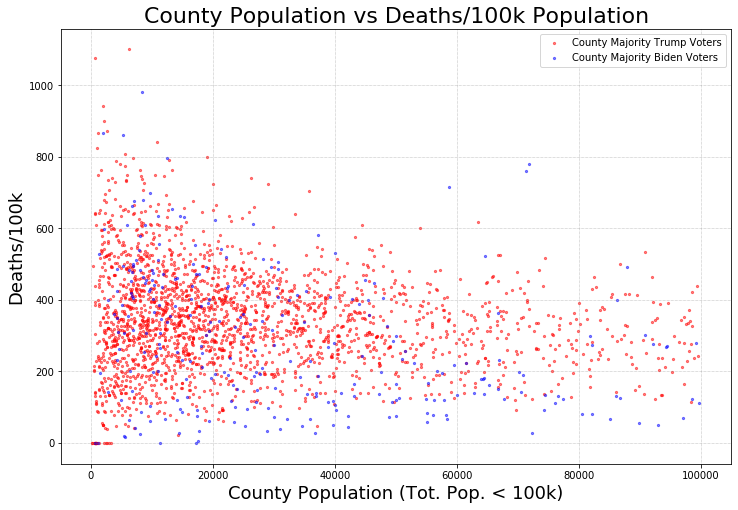

In [16]:


#examining smaller counties
temp = viz_df[viz_df['tot_pop']<100000]
temp_red = temp[temp['percent_red']>0.5]
temp_blue = temp[temp['percent_red']<=0.5]

#population v Deaths per 100k
plt.figure(figsize=(12, 8))
plt.scatter(temp_red['tot_pop'], temp_red['deaths_per_hun_thou'], s = 5, c='red', alpha=0.5)
plt.scatter(temp_blue['tot_pop'], temp_blue['deaths_per_hun_thou'], s = 5, c='blue', alpha=0.5)
plt.title('County Population vs Deaths/100k Population', size = 22)
plt.xlabel('County Population (Tot. Pop. < 100k)', size = 18)
plt.ylabel('Deaths/100k', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend(['County Majority Trump Voters', 'County Majority Biden Voters'])
plt.savefig('./assets/popo_v_death_2')
;

In counties with a population of less than 40k, it seems that blue and red counties enhabit roughly the same space. In counties larger than 40k we see that blue counties tend to have lower death rates than their red counterparts. 

''

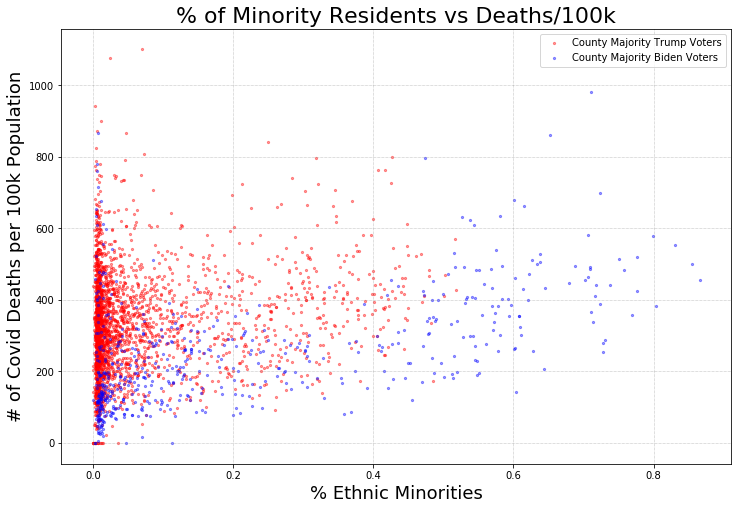

In [17]:
#minority population v deaths
temp_red = covid[covid['percent_red']>0.5]
temp_blue = covid[covid['percent_red']<=0.5]


plt.figure(figsize=(12, 8))
plt.scatter(temp_red['percent_minority'], temp_red['deaths_per_hun_thou'], s=5, alpha=0.4, c='red')
plt.scatter(temp_blue['percent_minority'], temp_blue['deaths_per_hun_thou'], s=5, alpha=0.4, c='blue')
plt.title('% of Minority Residents vs Deaths/100k', size = 22)
plt.xlabel('% Ethnic Minorities', size = 18)
plt.ylabel('# of Covid Deaths per 100k Population', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.legend(['County Majority Trump Voters', 'County Majority Biden Voters'])
plt.savefig('./assets/minorities_v_deaths')
;


Here we see that predominantly white, trump supporting counties have a much higher death rate than their biden supporting counter parts. For both red and blue counties, as the population of ethnic minorities increases, so does the death rate. This leads us to believe that minorities may be disproportionately impacted by covid. Another interesting observation is that counties with more than 50% ethnic minorities almost exclusively are majority biden supporters. 

''

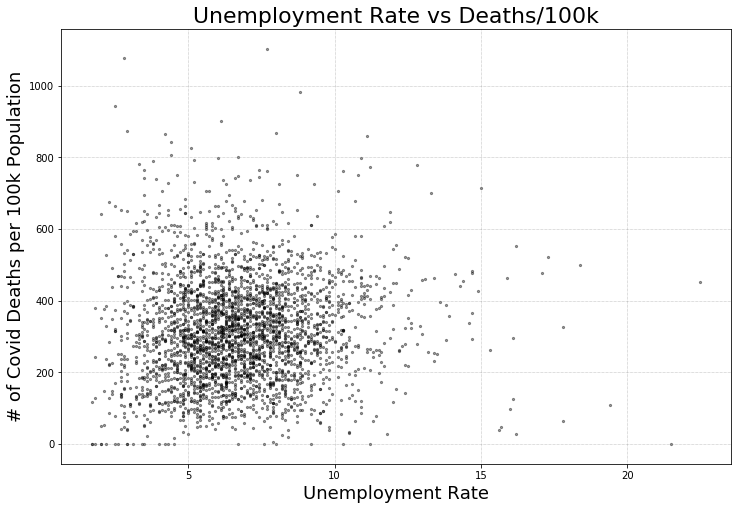

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(covid['unemployment_rate'], covid['deaths_per_hun_thou'], s=5, alpha=0.4, c='black')

plt.title('Unemployment Rate vs Deaths/100k', size = 22)
plt.xlabel('Unemployment Rate', size = 18)
plt.ylabel('# of Covid Deaths per 100k Population', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.savefig('./assets/unemployment_v_deaths_1')

;

This graph tells us very little about the relationship between unemployment and death rate, until we again examine it through a political lense

''

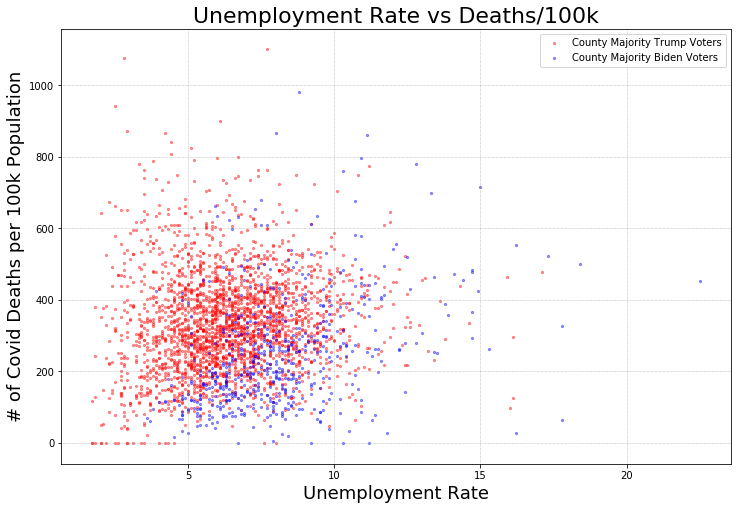

In [19]:
temp = covid
temp_red = temp[temp['percent_red']>= 0.5]
temp_blue = temp[temp['percent_red'] < 0.5]

plt.figure(figsize=(12, 8))
plt.scatter(temp_red['unemployment_rate'], temp_red['deaths_per_hun_thou'], s=5, alpha=0.4, c='red')
plt.scatter(temp_blue['unemployment_rate'], temp_blue['deaths_per_hun_thou'], s=5, alpha=0.4, c='blue')
plt.title('Unemployment Rate vs Deaths/100k', size = 22)
plt.xlabel('Unemployment Rate', size = 18)
plt.ylabel('# of Covid Deaths per 100k Population', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)

plt.legend(['County Majority Trump Voters', 'County Majority Biden Voters'])
plt.savefig('./assets/unemployment_v_deaths_2')
;

In this graph, we see that the blue points enhabit a different space from the red. The red points are prevalent in the lower unemployment, higher covid death rate space. 

''

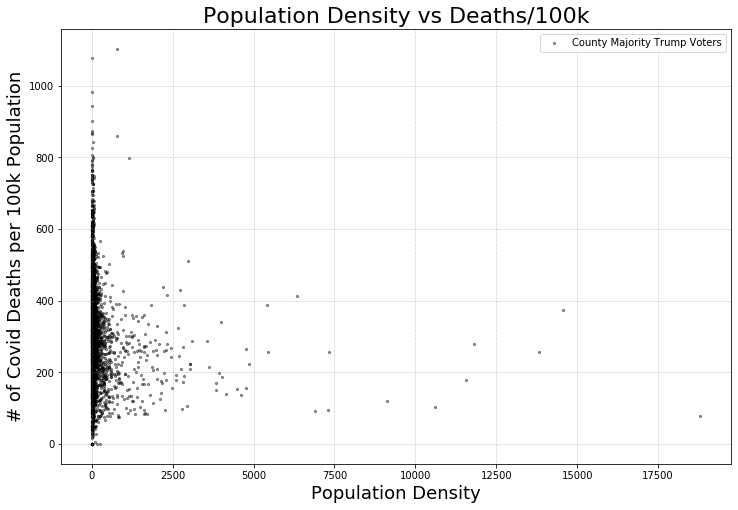

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(viz_df['population_density'], viz_df['deaths_per_hun_thou'], s=5, alpha=0.4, c='black')
plt.title('Population Density vs Deaths/100k', size = 22)
plt.xlabel('Population Density', size = 18)
plt.ylabel('# of Covid Deaths per 100k Population', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)

plt.legend(['County Majority Trump Voters', 'County Majority Biden Voters'])
;

In this graph we are not able to identify a clear relationship between population density and covid death rate. 

''

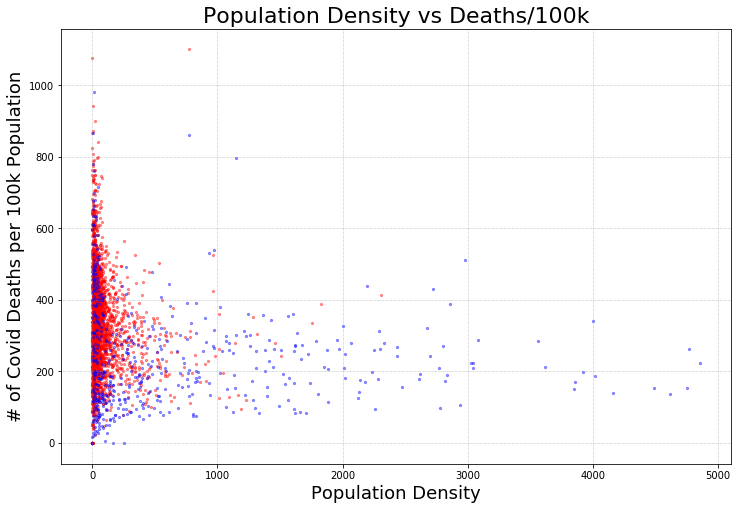

In [21]:
temp = viz_df[viz_df['population_density']<5000]
temp_red = temp[temp['percent_red']>= 0.5]
temp_blue = temp[temp['percent_red'] < 0.5]

plt.figure(figsize=(12, 8))
plt.scatter(temp_red['population_density'], temp_red['deaths_per_hun_thou'], s=5, alpha=0.4, c='red')
plt.scatter(temp_blue['population_density'], temp_blue['deaths_per_hun_thou'], s=5, alpha=0.4, c='blue')
plt.title('Population Density vs Deaths/100k', size = 22)
plt.xlabel('Population Density', size = 18)
plt.ylabel('# of Covid Deaths per 100k Population', size = 18)
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.savefig('./assets/pop_density_v_deaths')

;

Similar to previous findings, we see that densely populated counties are predominantly blue